# Zbiór danych
Zbiór danych *kredyt.csv* zawiera informacje dotyczące wniosków o kredyt hipoteczny w penym banku. Poszczególne kolumny reprezentują różne cechy związane z każdym wnioskiem:

- Loan_ID: Unikalny identyfikator każdego wniosku o kredyt.
- Gender: Płeć osoby składającej wniosek (mężczyzna/kobieta).
- Married: Status małżeński (żonaty/nie).
- Dependents: Liczba osób na utrzymaniu osoby składającej wniosek.
- Education: Poziom edukacji osoby składającej wniosek.
- Self_Employed: Czy osoba składająca wniosek jest samozatrudniona (tak/nie).
- ApplicantIncome: Dochód osoby składającej wniosek.
- CoapplicantIncome: Dochód współmałżonka lub współmałżonki osoby składającej wniosek.
- LoanAmount: Kwota kredytu hipotecznego wnioskowana przez osobę składającą wniosek.
- Loan_Amount_Term: Okres kredytowania (w miesiącach).
- Credit_History: Historia kredytowa (czy osoba składająca wniosek miała wcześniej kredyt hipoteczny, 1 - tak, 0 - nie).
- Property_Area: Lokalizacja nieruchomości (miejska/półmiejska/wiejska).
- Loan_Status: Status kredytu (zatwierdzony/niezatwierdzony).

# Zadanie
Przeprowadź eksploracyjną analizę danych zawartych w zbiorze *kredyt.csv*.
W tym celu wykonaj m.in. nastepujące kroki:
- zaimportj potrzebne biblioteki
- wczytaj zbiór danych
- scharakteryzuj zbiór (kształt, rodzaj zmiennych, statystyki opisowe)
- sprwdź, czy w zbiorze są jakieś braki, jeśli tak zadecyduj co z nimi zrobić
- postaw minimum 3 pytania badawcze / hipotezy badawcze; pytania badawcze powinny być złożone (np. hipoteza badawcza: "kredyt przyznawany jest częściej mężczyzną niż kobietą" jest zbyt trwialna); za pomocą wykresów określ, czy postawione hipotezy były słuszne czy nie
- podsumuj jakie wnioski można wyciągnąć po przeprowadzonej analizie  


1: Importowanie bibliotek

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Ustawienie stylu wykresów
sns.set(style="whitegrid")

2: Wczytanie danych

In [3]:
# Zakładając, że plik CSV jest w tym samym katalogu co notebook/script
data = pd.read_csv('kredyt.csv')

3: Charakterystyka zbioru

In [4]:
# Wyświetlenie pierwszych kilku wierszy danych
print(data.head())

# Sprawdzenie kształtu zbioru
print(data.shape)

# Typy danych i sprawdzenie brakujących wartości
data.info()

# Statystyki opisowe
data.describe()

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


4: Sprawdzenie i obsługa brakujących danych

In [5]:
# Sprawdzenie, które kolumny mają brakujące wartości
print(data.isnull().sum())

# Decyzje dotyczące obsługi brakujących danych, np. uzupełnienie medianą
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data.dropna(inplace=True)  # Usuwamy wiersze z brakującymi danymi

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Krok 5: Postawienie pytań badawczych / hipotez
Czy poziom edukacji wpływa na kwotę kredytu?
Czy osoby samozatrudnione mają większe szanse na uzyskanie wyższych kwot kredytów niż osoby niesamozatrudnione?
Wpływ kombinacji historii kredytowej i lokalizacji nieruchomości na zatwierdzenie wniosku o kredyt.


6: Analiza i wizualizacja danych

Wpływ historii kredytowej i lokalizacji nieruchomości na zatwierdzenie kredytu

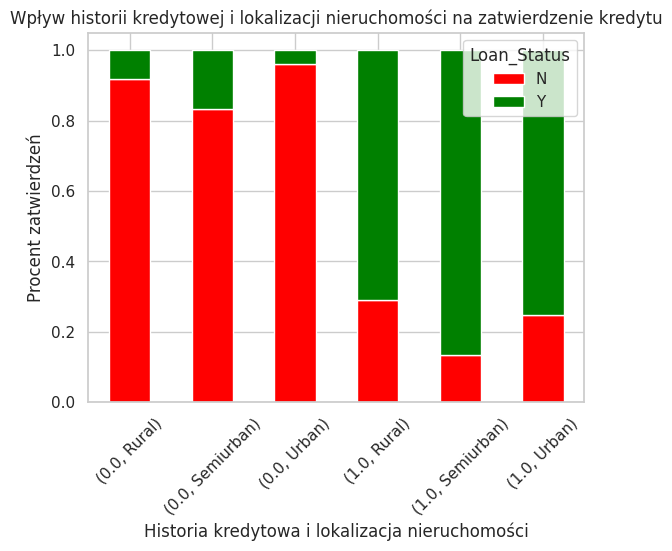

Chi-squared Test:
Chi-squared value =  140.58134496396116
p-value =  1.346150372999291e-28


In [14]:
# Tworzenie krzyżowej tabeli zliczeń
cross_tab = pd.crosstab(index=[data['Credit_History'], data['Property_Area']], columns=data['Loan_Status'], normalize='index')

# Tworzenie wykresu
cross_tab.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Wpływ historii kredytowej i lokalizacji nieruchomości na zatwierdzenie kredytu')
plt.ylabel('Procent zatwierdzeń')
plt.xlabel('Historia kredytowa i lokalizacja nieruchomości')
plt.xticks(rotation=45)
plt.show()

# Przygotowanie danych do testu chi-kwadrat
contingency_table = pd.crosstab(data['Credit_History'], [data['Property_Area'], data['Loan_Status']])

# Wykonanie testu chi-kwadrat
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Wyświetlenie wyników testu
print("Chi-squared Test:")
print("Chi-squared value = ", chi2)
print("p-value = ", p)

Analiza:

Wartość: 140.58134496396116

Wysoka wartość statystyki chi-kwadrat, jak w tym przypadku, wskazuje na silną zależność między badanymi zmiennymi. W kontekście analizy, oznacza to, że istnieje znaczący statystycznie związek między kombinacją historii kredytowej, lokalizacji nieruchomości a zatwierdzeniem wniosku o kredyt. Im większa wartość chi-kwadrat, tym silniejsza zależność między zmiennymi.

Wartość p (p-value)
Wartość: 1.346150372999291e-28

Wartość p bardzo bliska zeru (znacznie mniejsza niż typowy próg istotności statystycznej, np. 0.05 czy 0.01), wskazuje na to, że możemy odrzucić hipotezę zerową, która zakłada brak związku między badanymi zmiennymi. W praktyce, wynik ten potwierdza, że obserwowane różnice w zatwierdzaniu kredytów w zależności od historii kredytowej i lokalizacji nieruchomości nie są przypadkowe.

Podsumowanie
Podsumowując, wyniki testu chi-kwadrat pokazują, że kombinacja historii kredytowej i lokalizacji nieruchomości ma istotny wpływ na decyzje dotyczące zatwierdzania wniosków o kredyt. Można z ufnością stwierdzić, że te dwie zmienne są powiązane z wynikiem procesu kredytowego w analizowanym zbiorze danych.

Hipoteza: Istnieje zależność między poziomem edukacji a szansą na uzyskanie kredytu hipotecznego. Osoby z wyższym wykształceniem mają większe szanse na zatwierdzenie wniosku.

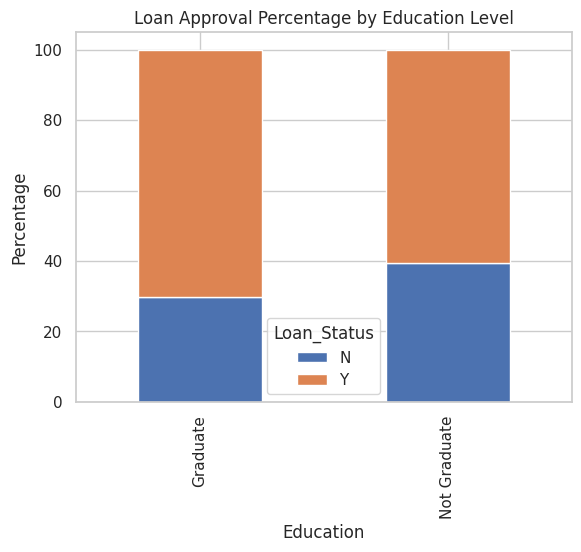

In [15]:
education_loan_status = data.groupby(['Education', 'Loan_Status']).size().unstack()
education_loan_status_pct = education_loan_status.div(education_loan_status.sum(axis=1), axis=0) * 100

education_loan_status_pct.plot(kind='bar', stacked=True)
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.title('Loan Approval Percentage by Education Level')
plt.legend(title='Loan_Status')
plt.show()

Interpretacja:

Osoby bez wykształcenia mają troche mniejszą szanse na uzyskanie kredytu.


Hipoteza: Status małżeński i liczba osób na utrzymaniu wpływają na decyzję o przyznaniu kredytu. Osoby w związku małżeńskim z mniejszą liczbą osób na utrzymaniu mają większe szanse na uzyskanie kredytu.

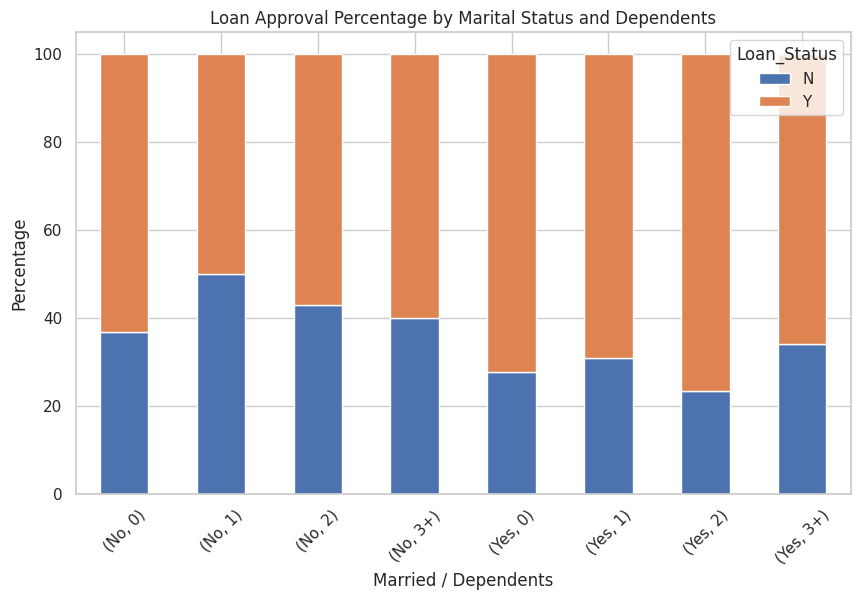

In [16]:
married_dependents_loan_status = data.groupby(['Married', 'Dependents', 'Loan_Status']).size().unstack()
married_dependents_loan_status_pct = married_dependents_loan_status.div(married_dependents_loan_status.sum(axis=1), axis=0) * 100

married_dependents_loan_status_pct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Married / Dependents')
plt.ylabel('Percentage')
plt.title('Loan Approval Percentage by Marital Status and Dependents')
plt.legend(title='Loan_Status')
plt.xticks(rotation=45)
plt.show()

Interpretacja:

Z wykresu można wyczytać że osoby w małżeństwie mają większą szance na uzyskanie kredytu, jednakże ilość dzieci nie wpływa na szanse przyznania kredytu.